Q1 What is Deep Learning? Briefly describe how it evolved and how it differs
from traditional machine learning.

Ans1 Deep Learning is a subfield of Machine Learning that focuses on training artificial neural networks with multiple hidden layers to learn complex patterns from large amounts of data. It evolved from early neural network models such as the perceptron introduced in the 1950s. Initially, progress was slow due to limited data and computational power. With the advent of big data, powerful GPUs, and improved algorithms like backpropagation, deep learning gained prominence around the 2010s. Unlike traditional machine learning, which relies heavily on manual feature engineering and shallow models, deep learning automatically learns features from raw data and performs exceptionally well on unstructured data such as images, speech, and text.

Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?

Ans2 A perceptron is the simplest form of a neural network and consists of input nodes, associated weights, a bias term, and an activation function. Each input is multiplied by its corresponding weight, summed together, and added to a bias. This weighted sum is passed through an activation function, usually a step function, to produce the final output. The perceptron learns by adjusting its weights based on the prediction error. However, it has several limitations. It can only solve linearly separable problems and fails on problems like XOR. Additionally, it uses only a single layer and lacks the ability to learn complex patterns.

Question 3: Describe the purpose of activation functions in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

Ans 3 Activation functions introduce non-linearity into neural networks, allowing them to learn complex relationships between inputs and outputs. Without activation functions, neural networks would behave like linear models regardless of depth. The Sigmoid function maps input values between 0 and 1, making it suitable for binary classification, but it suffers from vanishing gradient problems. The Tanh function outputs values between -1 and 1 and is zero-centered, which improves learning compared to Sigmoid, though it still faces vanishing gradients. ReLU, or Rectified Linear Unit, outputs zero for negative inputs and the input itself for positive values. It is computationally efficient and widely used in deep networks, although it can suffer from the “dead neuron” problem.

Question 4: What is the difference between a Loss function and a Cost function in neural networks? Provide examples.

Ans 4
A loss function measures the error between the predicted output and the actual output for a single training example, while a cost function represents the average loss over the entire training dataset. In simple terms, loss is calculated per data point, whereas cost summarizes the model’s overall performance. For example, Mean Squared Error or Binary Cross-Entropy can be used as loss functions for individual samples, and their average across all samples forms the cost function used for optimization during training.

Question 5: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.

Ans5 Optimizers are algorithms used to update the weights of a neural network in order to minimize the loss function. Gradient Descent updates weights using a fixed learning rate in the direction of the negative gradient, but it can be slow and sensitive to learning rate selection. RMSprop improves upon Gradient Descent by adapting the learning rate for each parameter based on recent gradients, making it effective for non-stationary problems. Adam combines the benefits of both momentum and RMSprop by maintaining adaptive learning rates and moving averages of gradients, resulting in faster convergence and better performance, which is why it is widely used in practice.

In [ ]:
'''Question 6: Write a Python program to implement a single-layer perceptron to solve the AND gate.'''
import numpy as np

# AND gate dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

# Initialize weights and bias
weights = np.zeros(2)
bias = 0
lr = 0.1

# Training
for epoch in range(10):
    for i in range(len(X)):
        y_pred = 1 if np.dot(X[i], weights) + bias > 0 else 0
        error = y[i] - y_pred
        weights += lr * error * X[i]
        bias += lr * error

# Testing
for i in range(len(X)):
    print(X[i], "->", 1 if np.dot(X[i], weights) + bias > 0 else 0)



[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


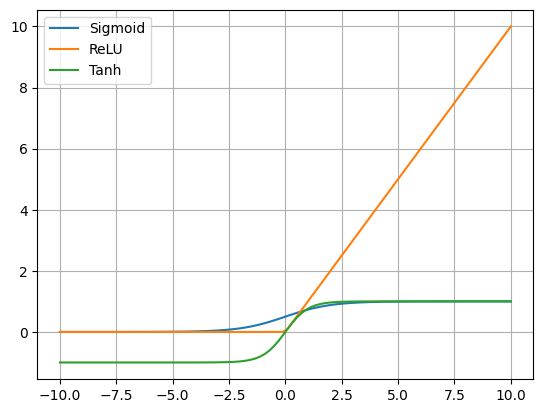

In [ ]:
'''Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions.'''
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, relu, label="ReLU")
plt.plot(x, tanh, label="Tanh")
plt.legend()
plt.grid()
plt.show()


In [ ]:
'''Question 8: Use Keras to build and train a simple multilayer neural network on the MNIST dataset.'''

import tensorflow as tf
from tensorflow.keras import layers, models

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

print("Training Accuracy:", history.history['accuracy'][-1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8715 - loss: 0.4537 - val_accuracy: 0.9642 - val_loss: 0.1248
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9632 - loss: 0.1239 - val_accuracy: 0.9737 - val_loss: 0.0918
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9771 - loss: 0.0778 - val_accuracy: 0.9752 - val_loss: 0.0863
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9813 - loss: 0.0610 - val_accuracy: 0.9775 - val_loss: 0.0798
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9873 - loss: 0.0432 - val_accuracy: 0.9795 - val_loss: 0.0748
Training Accuracy: 0.985870361328125


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7725 - loss: 0.6498 - val_accuracy: 0.8538 - val_loss: 0.4130
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8602 - loss: 0.3954 - val_accuracy: 0.8620 - val_loss: 0.3784
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8752 - loss: 0.3463 - val_accuracy: 0.8680 - val_loss: 0.3554
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8797 - loss: 0.3278 - val_accuracy: 0.8772 - val_loss: 0.3465
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8909 - loss: 0.2989 - val_accuracy: 0.8830 - val_loss: 0.3184


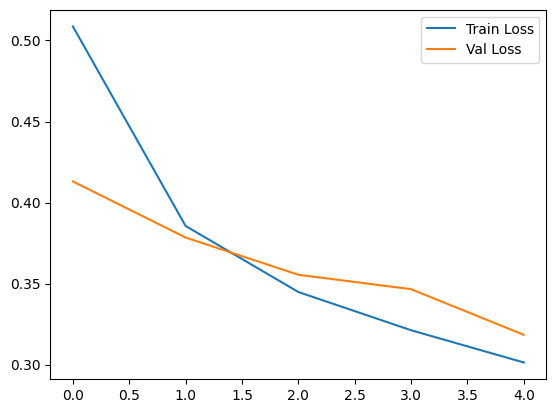

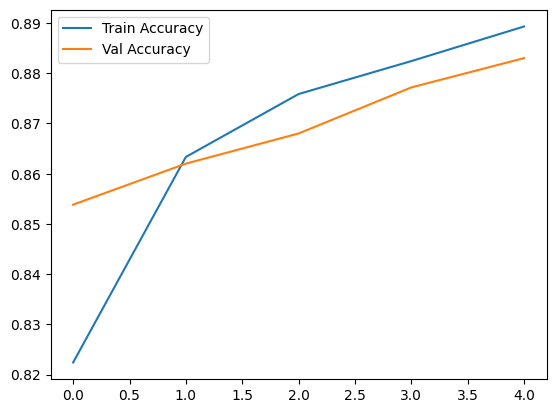

In [ ]:
'''Question 9: Visualize the loss and accuracy curves for Fashion MNIST and interpret the results.'''
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()


In [ ]:
'''Question 10: Question 10: You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.
Explain your real-time data science workflow:
● How would you design a deep learning model (perceptron or multilayer NN)?
● Which activation function and loss function would you use, and why?
● How would you train and evaluate the model, considering class imbalance?
● Which optimizer would be suitable, and how would you prevent overfitting?
(Include your Python code and output in the code box below.)
'''
import tensorflow as tf
from tensorflow.keras import layers, models

# Placeholder: number of input features after preprocessing
num_features = 10

# Build the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_features,)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

# Summary of the model
model.summary()

# In practice, X_train, y_train, and class_weights come from real data
# model.fit(X_train, y_train, epochs=20, class_weight=class_weights)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)